# Projektna naloga pri predmetu Programiranje 1
_Matej Melanšek_ - 27181069

In [26]:
import pandas as pd
from IPython.display import display, HTML
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [67]:
igralci = pd.read_csv('podatki.csv')

Iz spletne sptrani [Transfermarkt](https://www.transfermarkt.com/ "https://www.transfermarkt.com/"), ki je najpopularnejša domena za iskanje podatkov o nogometnih igralcih in njihovih prestopih, sem pobral vse igralce najboljših petih evropskih nogometnih lig (Premier Ligue - GB1, LaLiga - ES1, Bundesliga - L1, Serie A - IT1, Ligue 1 - FR1). Za vsakega izmed igralcev sem zajel: njihovo ime, tržno vrednost (podano v milijonih evrih), starost, višino (v cm), državljanstvo, močnejšo nogo in ligo v kateri igrajo.

S temi podatki bom poskušal potrditi ali pa odvreči **hipoteze**:
- najdražji igralci so Brazilci
- LaLiga (ES1) ima povprečno najnižje igralce
- Serie A (IT1) ima povprečno najstarejše igralce
- delež nogometašev najboljših petih evropskih lig, ki raje uporabljajo levo nogo, je večji kot delež ljudi, ki raje uporabljajo levo nogo v splošni populaciji
- ne obstaja korelacija med igralčevo višino in njegovo tržno vrednostjo
- v vsaki ligi je največji delež igralcev državljanov tiste države, ki gosti ligo

In [68]:
igralci

,ID,Ime,TrznaVrednost,Starost,Visina,Drzavljanstvo,MocnejsaNoga,Liga
0,2857,Eldin Jakupovic,0.30,36,191.0,Switzerland,right,GB1
1,3333,James Milner,3.00,35,175.0,England,right,GB1
2,3455,Zlatan Ibrahimovic,4.00,39,195.0,Sweden,both,IT1
3,5578,Nicolas Penneteau,0.20,40,185.0,France,left,FR1
4,6442,Antonio Rosati,0.10,38,195.0,Italy,right,IT1
...,...,...,...,...,...,...,...,...
2766,859396,Metinho,5.00,18,178.0,Brazil,right,FR1
2767,876034,Yanis Guermouche,0.15,20,192.0,France,NaN,FR1
2768,880169,Nabil Ouennas,0.10,18,195.0,Algeria,NaN,FR1
2769,880330,Moïse Sahi Dion,0.80,19,175.0,Cote d'Ivoire,left,FR1


Preden poizkušamo podrobno odvreči ali potrditi hipoteze, opravimo bolj splošno analizo podatkov.

<br/>
<br/>

# Splošna analiza podatkov

___
## &nbsp; &nbsp; Povprečen igralec

In [69]:
igralci[['TrznaVrednost','Starost','Visina']].mean().round(2)

TrznaVrednost      9.61
Starost           25.61
Visina           182.79
dtype: float64

Povprečen igralec najboljših petih evropskih lig je vreden malo manj kot 10,000,000.00€, star je med 25 in 26 let in je visok skoraj 183cm.  Če igralce primerjamo s povprečno osebo, ki ima neto vrednost 79,952€, je stara približno 31 let in je visoka 1,70cm, če je moškega spola in 1,60cm če je ženskega, vidimo da nogometaši močno odstopajo od povprečja.

---
##  &nbsp; &nbsp; Najdražji in najcenejši igralci

In [70]:
display(igralci[['Ime','TrznaVrednost']].sort_values('TrznaVrednost'))

,Ime,TrznaVrednost
2728,Valentin Decarpentrie,0.1
1970,Baris Ekincier,0.1
43,Gianluca Pegolo,0.1
2010,Daniel Klein,0.1
1508,Aston Oxborough,0.1
...,...,...
493,Romelu Lukaku,100.0
309,Neymar,100.0
698,Harry Kane,120.0
2132,Erling Haaland,130.0


In [71]:
igralci.iloc[1790]

ID                      342229
Ime              Kylian Mbappé
TrznaVrednost              160
Starost                     22
Visina                     178
Drzavljanstvo           France
MocnejsaNoga             right
Liga                       FR1
Name: 1790, dtype: object

Najdražji igralec na Svetu je pričakovano mlad Francoz Kylian Mbappé, zanimivo je, da so sledeči štirje nogometaši pravtako napadalci.  
Opazimo, da je najcenejših igralcev, oziroma igralcev, ki so vredni "samo" 100,000€, kar 32.

In [72]:
najcenejši_igralci = igralci[igralci.TrznaVrednost == 0.1]
najcenejši_igralci['ID'].count()

32

---
##  &nbsp; &nbsp; Državljanstva igralcev

V reprezentančnem nogometu je Velika Britanija razdeljena na štiri dele: Angija, Škotska, Wales in Severna Irska. Zato je pravtako v mojih podatkih Velika Britanija razdeljena na te štiri reprezentance.

In [78]:
igralci.groupby('Drzavljanstvo').size().sort_values(ascending=False)

Drzavljanstvo
France      386
Spain       374
Germany     265
Italy       262
England     212
           ... 
Haiti         1
Honduras      1
Comoros       1
Chad          1
Iran          1
Length: 108, dtype: int64

Najbolje zastopane države so, pričakovano, ravno tiste, ki gostijo najboljših pet evropskih nogometnih lig. Preverimo lahko povprečne višine nogometašev teh petih držav in jih primerjamo s povprečno višino moške populacije teh državah, ter preverimo pri katerih pride do največjega odstopanja (podatki o povprečni višini prebivalstva: [Wikipedia](https://en.wikipedia.org/wiki/Average_human_height_by_country#Height_surveys_and_studies "https://en.wikipedia.org/wiki/Average_human_height_by_country#Height_surveys_and_studies"))

In [79]:
Povp_v_FR = igralci[igralci.Drzavljanstvo == 'France'].Visina.sum()/igralci[igralci.Drzavljanstvo == 'France'].ID.count()
Povp_v_SP = igralci[igralci.Drzavljanstvo == 'Spain'].Visina.sum()/igralci[igralci.Drzavljanstvo == 'Spain'].ID.count()
Povp_v_NE = igralci[igralci.Drzavljanstvo == 'Germany'].Visina.sum()/igralci[igralci.Drzavljanstvo == 'Germany'].ID.count()
Povp_v_IT = igralci[igralci.Drzavljanstvo == 'Italy'].Visina.sum()/igralci[igralci.Drzavljanstvo == 'Italy'].ID.count()
Povp_v_AN = igralci[igralci.Drzavljanstvo == 'England'].Visina.sum()/igralci[igralci.Drzavljanstvo == 'England'].ID.count()
Povp_v = ({'Država':['Francija','Španija','Nemčija','Italija','Anglija'],
            'Povprečna Višina':[Povp_v_FR,Povp_v_SP,Povp_v_NE,Povp_v_IT,Povp_v_AN]})

visina_populacija = ({'Država':['Nemčija','Anglija','Francija','Španija','Italija'],
                     'Povprečna Višina':[178,175.3,174.1,173.1,176.5]})

df1 = pd.DataFrame(Povp_v).sort_values(by = 'Povprečna Višina', ascending=False)
df2 = pd.DataFrame(visina_populacija)
display(df1.style.set_table_attributes("style='display:inline'").set_caption('Povprečna višina &nbsp&nbsp&nbsp&nbsp&nbsp nogometašev'))
display(df2.style.set_table_attributes("style='display:inline'").set_caption('Povprečna višina moške populacije'))

,Država,Povprečna Višina
2,Nemčija,182.162264
4,Anglija,180.783019
0,Francija,179.624352
1,Španija,179.561497
3,Italija,178.278626


,Država,Povprečna Višina
0,Nemčija,178.000000
1,Anglija,175.300000
2,Francija,174.100000
3,Španija,173.100000
4,Italija,176.500000


Vidimo, da so nogometaši višji od povprečnega moškega, zanimivo je, da kljub temu da so po podatkih wikipedije Italijani drugi najvišji na tem seznamu, so njihovi nogometaši najnižji. Preverimo še v kateri državi je ta razlika najbolj izrazita.

In [80]:
razlika_visine = ({'Država':['Francija','Španija','Nemčija','Italija','Anglija'],
                   'Razlika v višini [%]':[(Povp_v_FR/174.1 - 1)*100,(Povp_v_SP/173.1 - 1)*100,
                    (Povp_v_NE/178 - 1)*100,(Povp_v_IT/176.5 - 1)*100,(Povp_v_AN/175.3 - 1)*100]})
pd.DataFrame(razlika_visine).sort_values(by = 'Razlika v višini [%]', ascending=False)

,Država,Razlika v višini [%]
1,Španija,3.732812
0,Francija,3.173092
4,Anglija,3.127792
2,Nemčija,2.338351
3,Italija,1.007720


Največja razlika med višinami nogometašev in splošne moške populacije je v Španiji in ta znaša le 3.7%.

---
## &nbsp; &nbsp; Vrednosti Lig

Preverimo še katera liga je najdražja oziroma najcenejša in katera je povprečno najdražja oziroma najcenejša. Napišimo funkcijo, ki bo seštela vrednosti vseh igralcev vsake lige in povprečno vrednost igralcev vsake lige, ter podatke podala v tabeli.

In [81]:
def vrednost_lig(sez_lig):
    dict = {}
    for liga in sez_lig:
        vrednost = igralci[igralci.Liga == liga].TrznaVrednost.sum()
        st_igralcev = igralci[igralci.Liga == liga].ID.count()
        dict[liga] = {'Vrednost': vrednost,'Povprečna Vrednost': vrednost/st_igralcev}
    return pd.DataFrame(dict).T    

In [82]:
df1 = vrednost_lig(['GB1','ES1','L1','IT1','FR1']).sort_values(by = 'Vrednost', ascending=False)
df2 = vrednost_lig(['GB1','ES1','L1','IT1','FR1']).sort_values(by = 'Povprečna Vrednost', ascending=False)
display(df1.style.set_table_attributes("style='display:inline'").set_caption('Urejeno po Vrednosti [mil €]'))
display(df2.style.set_table_attributes("style='display:inline'").set_caption('Urejeno po povprečni vrednosti [mil €]'))

,Vrednost,Povprečna Vrednost
GB1,8991.200000,16.288406
ES1,4897.425000,9.509563
IT1,4853.100000,8.021653
L1,4218.975000,8.036143
FR1,3680.225000,6.411542


,Vrednost,Povprečna Vrednost
GB1,8991.200000,16.288406
ES1,4897.425000,9.509563
L1,4218.975000,8.036143
IT1,4853.100000,8.021653
FR1,3680.225000,6.411542


Angleška Premier Liga ima največjo skupno **in** povprečno vrednost nogometašev, kar ni presenetljivo, kajti že vrsto let od sponzorskih in TV pogodb angleški klubi dobivajo veliko več denarja kot pa klubi vseh ostalih lig, z izjemo španskih velikanov Real Madrida in Barcelone ([TV pogodbe top 5 lig](https://www.danielgeey.com/post/football-broadcasting-deals-across-the-top-5-european-leagues/ "www.danielgeey.com")).

<br/>
<br/>


# Hipoteze

---
## &nbsp; &nbsp; Hipozeta 1:
_Najdražji igralci so Brazilci_

Najprej moramo napisati funkcijo, ki bo seštela vrednosti igralcev iz iste države in nato to vrednost delila s številom igralcev iz te države, ter podala dobljene podatke v obliki tabele.

In [83]:
def povprecna_vr_po_drzavljanstvu(df):
    data = {}
    dict = {}
    st_drzav = len(df.groupby('Drzavljanstvo').size().index)
    for n in range(st_drzav):
        drzava = df.groupby('Drzavljanstvo').size().index[n]
        trzna_v = df.groupby('Drzavljanstvo').TrznaVrednost.sum()[n]
        st_igralcev = df.groupby('Drzavljanstvo').size()[n]
        dict[drzava] = (((trzna_v / st_igralcev) * 1000 ) // 10) / 100
    data['Države'] = dict.keys()
    data['Vrednost'] = dict.values()
    return pd.DataFrame(data)

Oglejmo si sedaj katero državo v Evropskem nogometu zastopajo najdražji igralci. 

In [84]:
povprecna_vr_po_drzavljanstvu(igralci).sort_values(by = 'Vrednost', ascending=False).head(10)

,Države,Vrednost
15,Canada,52.50
34,Egypt,30.50
13,Burkina Faso,21.00
81,Portugal,18.57
8,Belgium,18.42
106,Zambia,17.50
11,Brazil,17.11
59,"Korea, South",16.85
35,England,14.91
3,Argentina,14.56


In [85]:
igralci[igralci.Drzavljanstvo == 'Canada']

,ID,Ime,TrznaVrednost,Starost,Visina,Drzavljanstvo,MocnejsaNoga,Liga
2156,424204,Alphonso Davies,70.0,20,183.0,Canada,left,L1
2436,533738,Jonathan David,35.0,21,180.0,Canada,both,FR1


Opazimo, da v najboljših petih evropskih ligah igrata le dva Kanadčana. Oba imata visoko vrednost, zato dobljeni podatki niso zelo zanimivi, vzemimo raje le samo države z desetimi ali več igralci.

In [86]:
igralci_drzave_10 = igralci.groupby('Drzavljanstvo').size().sort_values(ascending=False)[:42]
ig10 = igralci[igralci.Drzavljanstvo.isin(igralci_drzave_10.index)]
povprecna_vr_po_drzavljanstvu(ig10).sort_values(by = 'Vrednost', ascending=False).head(10)

,Države,Vrednost
28,Portugal,18.57
4,Belgium,18.42
6,Brazil,17.11
14,England,14.91
2,Argentina,14.56
40,Uruguay,14.01
30,Scotland,13.21
24,Netherlands,13.12
26,Norway,12.86
39,United States,12.03


Prva hipoteza je odvržena, Brazilci so med tremi najdražjim, vendar so Belgijci in Portugalci povprečno dražji. Zanimivo, kjubt temu da je najdražji nogometaš na Svetu Kylian Mbappé, Francozi niso niti med povprečno najdražjimi 10 državljanstvi nogometašev.

Preverimo še, če so Brazilci vendarle povprečno najdražji v kateri ligi. Vzemimo samo države z več kot 20 predstavniki.

In [87]:
igralci_drzave_20 = igralci.groupby('Drzavljanstvo').size().sort_values(ascending=False)[:27]
igralci_GB1 = igralci[(igralci.Liga == 'GB1') & (igralci.Drzavljanstvo.isin(igralci_drzave_20.index))]
igralci_ES1 = igralci[(igralci.Liga == 'ES1') & (igralci.Drzavljanstvo.isin(igralci_drzave_20.index))]
igralci_L1 = igralci[(igralci.Liga == 'L1') & (igralci.Drzavljanstvo.isin(igralci_drzave_20.index))]
igralci_IT1 = igralci[(igralci.Liga == 'IT1') & (igralci.Drzavljanstvo.isin(igralci_drzave_20.index))]
igralci_FR1 = igralci[(igralci.Liga == 'FR1') & (igralci.Drzavljanstvo.isin(igralci_drzave_20.index))]
df1 = povprecna_vr_po_drzavljanstvu(igralci_GB1).sort_values(by = 'Vrednost', ascending=False).head(3)
df2 = povprecna_vr_po_drzavljanstvu(igralci_ES1).sort_values(by = 'Vrednost', ascending=False).head(3)
df3 = povprecna_vr_po_drzavljanstvu(igralci_L1).sort_values(by = 'Vrednost', ascending=False).head(3)
display(df1.style.set_table_attributes("style='display:inline'").set_caption('Angleška Liga'))
display(df2.style.set_table_attributes("style='display:inline'").set_caption('Španska Liga'))
display(df3.style.set_table_attributes("style='display:inline'").set_caption('Nemška Liga'))

,Države,Vrednost
0,Algeria,32.000000
3,Belgium,29.730000
21,Senegal,29.200000


,Države,Vrednost
2,Austria,55.000000
11,Germany,50.000000
3,Belgium,31.000000


,Države,Vrednost
15,Mali,19.000000
20,Portugal,18.200000
5,Colombia,17.000000


In [88]:
df4 = povprecna_vr_po_drzavljanstvu(igralci_IT1).sort_values(by = 'Vrednost', ascending=False).head(3).round(2)
df5 = povprecna_vr_po_drzavljanstvu(igralci_FR1).sort_values(by = 'Vrednost', ascending=False).head(3).round(2)
display(df4.style.set_table_attributes("style='display:inline'").set_caption('Italijanska Liga'))
display(df5.style.set_table_attributes("style='display:inline'").set_caption('Francoska Liga'))

,Države,Vrednost
9,England,16.780000
19,Portugal,15.310000
0,Algeria,13.620000


,Države,Vrednost
1,Argentina,27.140000
8,Denmark,22.000000
14,Italy,16.280000


Opazimo, da tudi v posameznih ligah Brazilci niso povprečno najdražji, torej je prva hipoteza povsem odvržena.

---
## &nbsp; &nbsp; Hipoteza 2:
_LaLiga (ES1) ima povprečno najnižje igralce_

In [89]:
igralci.groupby('Liga').Visina.mean().round(2)

Liga
ES1    181.09
FR1    181.92
GB1    182.84
IT1    183.97
L1     184.02
Name: Visina, dtype: float64

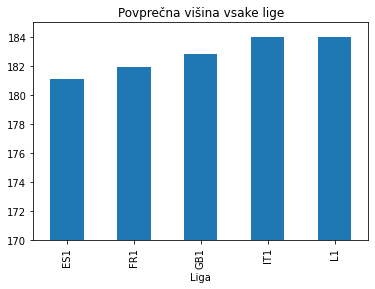

In [90]:
igralci.groupby('Liga').Visina.mean().plot.bar(ylim=(170,185), title = 'Povprečna višina vsake lige');

Pričakovano je, zaradi velikega deleža španskih igralcev v LaLaligi, ta hipoteza potrjena. Presenetljivo pa je, da kljub temu da je Serie A znana po visokih, fizičnih, obrambnih igralcih, povprečna višina v Bundesligi nekoliko višja.

---
## &nbsp; &nbsp; Hipoteza 3:
_Serie A (IT1) ima povprečno najstarejše igralce_

In [91]:
starost_igralcev = igralci.groupby('Liga').Starost.mean().sort_values()
starost_igralcev.round(2)

Liga
FR1    24.55
L1     24.78
IT1    25.87
GB1    26.03
ES1    26.87
Name: Starost, dtype: float64

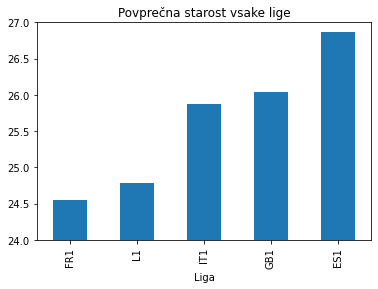

In [92]:
starost_igralcev.plot.bar(ylim=(24,27), title = 'Povprečna starost vsake lige');

Hipoteza je odvržena, najstarejše igralce ima LaLiga. Serie A ni niti na drugem mestu, kajti ima Premier liga povprečno nekoliko starejše igralce. 

---
## &nbsp; &nbsp; Hipoteza 4:
_delež nogometašev najboljših petih evropskih lig, ki raje uporabljajo levo nogo, je večji kot delež ljudi, ki raje uporabljajo levo nogo v splošni populaciji_

Delež ljudi, ki raje uporablja desno nogo v splošni populaciji je 81.0% ([wikipedija](https://en.wikipedia.org/wiki/Laterality#Human "https://en.wikipedia.org/wiki/Laterality#Human"), tabela po razdelkom Human), torej je teh ki raje uporablja levo nogo približno 19.0%.

In [93]:
st_igralcev = igralci['MocnejsaNoga'].dropna().count()
igralci.groupby('MocnejsaNoga').size() / st_igralcev

MocnejsaNoga
both     0.042373
left     0.252395
right    0.705232
dtype: float64

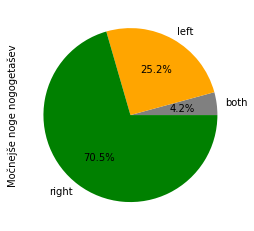

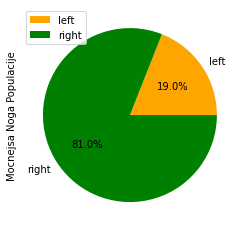

In [94]:
(igralci.groupby('MocnejsaNoga').size() / st_igralcev).plot.pie(ylabel = 'Močnejše noge nogogetašev',autopct='%1.1f%%',colors=['gray','orange','green']);
pd.DataFrame({'Mocnejsa Noga Populacije':[0.19,0.81]},index=['left','right']).plot.pie(y='Mocnejsa Noga Populacije',autopct='%1.1f%%',colors=['orange','green']);

Kot vidimo je med nogometaši in splošno populacijo velika razlika v perferenci nog.

---
## &nbsp; &nbsp; Hipoteza 5:
_Ne obstaja korelacija med igralčevo višino in njegovo tržno vrednostjo_

Korelacijo najlažje preverimo s korelacijskim grafom (ang. scatter plot).

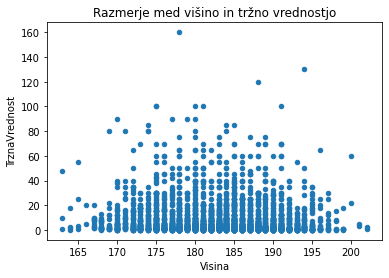

In [95]:
igralci.sort_values('TrznaVrednost').plot.scatter(x='Visina',y='TrznaVrednost',title = 'Razmerje med višino in tržno vrednostjo');

Iz tega grafa ni razvidna očitna korelacija med višino in tržno vrednostjo igralca. Preverimo raje z grafom povprečnih tržnih vrednosti igralcev za vsako višino.

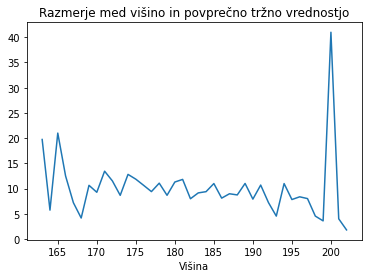

In [96]:
igralci.groupby('Visina').TrznaVrednost.mean().plot(title = 'Razmerje med višino in povprečno tržno vrednostjo',xlabel='Višina');

In [97]:
display(igralci[igralci.Visina < 165][['Ime','TrznaVrednost']])
display(igralci[igralci.Visina >= 200][['Ime','TrznaVrednost']])

,Ime,TrznaVrednost
225,Pablo Piatti,1.2
701,Lorenzo Insigne,48.0
759,Ryan Fraser,10.0
901,Joel Valencia,0.4
1096,Jimmy Cabot,2.0
2030,Rafik Guitane,2.5
2380,Tariq Lamptey,18.0


,Ime,TrznaVrednost
207,Fraser Forster,3.0
543,Thibaut Courtois,60.0
702,Dan Burn,5.0
1349,Vanja Milinković-Savić,0.8
1919,Sasa Kalajdzic,22.0
2256,Kjell Scherpen,2.8


Še vedno ne opazimo prave korelacije med višino in tržno vrednostjo. Do odstopanj prihaja le na koncih grafa, kjer so zelo nizki oziroma zelo visoki igralci. Toda to je najverjetneje posledica malega števila igralcev, ki so nižji od 165cm oziroma višji od 200cm.

---
## &nbsp; &nbsp; Hipoteza 6
_v vsaki ligi je največji delež igralcev državljanov tiste države, ki gosti ligo_

Najprej napišimo funkcijo, ki bo za določeno ligo poiskala pet najbolj pogostih državljanstev igralcev v ligi.

In [98]:
def tri_drzavljanstsva(liga):
    dict = {}
    igralci_l = igralci[igralci.Liga == liga]
    drzave = igralci_l.groupby('Drzavljanstvo').size().index
    for drzava in drzave:
        dict[drzava] = igralci[(igralci.Liga == liga) & (igralci.Drzavljanstvo == drzava)].ID.count()
    return pd.DataFrame(dict,index=['Število Igralcev']).T.sort_values(by = 'Število Igralcev', ascending=False)[:5]
            

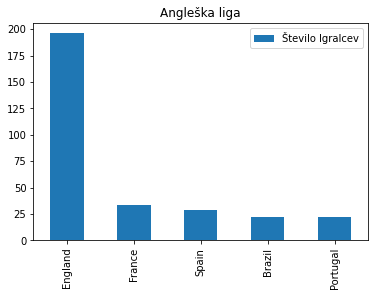

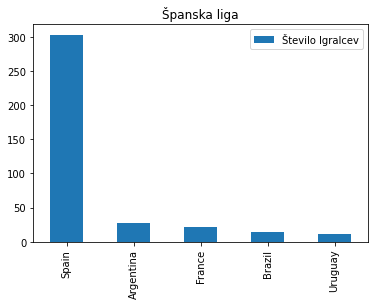

In [99]:
tri_drzavljanstsva('GB1').plot.bar(title = 'Angleška liga');
tri_drzavljanstsva('ES1').plot.bar(title = 'Španska liga');

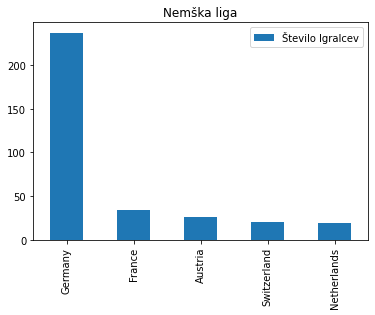

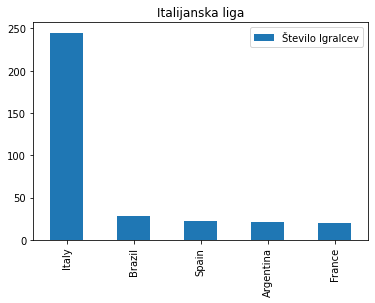

In [100]:
tri_drzavljanstsva('L1').plot.bar(title = 'Nemška liga');
tri_drzavljanstsva('IT1').plot.bar(title='Italijanska liga');

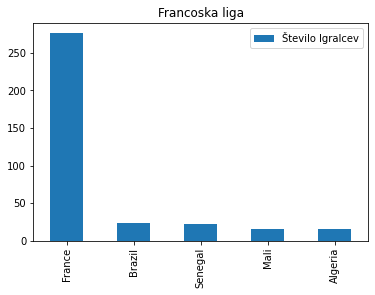

In [101]:
tri_drzavljanstsva('FR1').plot.bar(title='Francoska liga');

Zadnja hipoteza je potrjena, velika večina igralcev vsake lige prihaja iz države, ki gosti ligo.

<br/>
<br/>

# Zaključek

Potrdil sem polovico delovnih hipotez (hipoteze 2, 4 in 6), kar me ni presenetilo, kajti bi lahko nanje odgovril vsak, ki nekoliko bolj podrobno spremlja evropski nogomet. Pravtako me ni presenetilo, da sem odvrgel hipotezo 1, kajti se vsako sezono tržne vrednosti igralcev zelo spreminjajo, brazilski nogometaši pa so bili blizu vrha povprečno najdražjih igralcev. Nekoliko me je presenetila analiza podatkov za hipotezo 3, kajti je bila italijanska liga nekoč znana po visokih, starejših, bolj izkušenih nogometaših, danes pa je med najboljšimi petimi ligami po starosti le na tretjem mestu. Hipoteza 5 je zaradi male količine robnih podatkov preveč dvoumna, da bi jo lahko potrdil ali odvrgel.

Zaradi hitrega spreminjanja stanj v evropskem nogometu, bi bilo zanimivo čez par let ponovno pognati python kodo in v jupyter notebooku analizirati enake podatke, ter jih primerjati z današnjimi.